# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [2]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head(10)

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/19 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/19 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/19 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/19 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/19 4:28,34.58,3.908450e+12,46,Urban
5,South Latoya,3/11/19 12:26,9.52,1.995000e+12,10,Urban
6,New Paulville,2/27/19 11:17,43.25,7.932080e+11,44,Urban
7,Simpsonburgh,4/26/19 0:43,35.98,1.119540e+11,21,Urban
8,South Karenland,1/8/19 3:28,35.09,7.995620e+12,4,Urban
9,North Jasmine,3/9/19 6:26,42.81,5.327640e+12,33,Urban


## Deliverable 1: Get a Summary DataFrame 

In [3]:
#  1. Get the total rides for each city type
rides_per_city_type = pyber_data_df.groupby(["type"]).count()["ride_id"]
rides_per_city_type

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [4]:
# 2. Get the total drivers for each city type
total_drivers_per_city_type = city_data_df.groupby(["type"]).sum()["driver_count"]
total_drivers_per_city_type

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [5]:
#  3. Get the total amount of fares for each city type
total_fares_per_city_type = pyber_data_df.groupby(["type"]).sum()["fare"]
total_fares_per_city_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [6]:
#  4. Get the average fare per ride for each city type. 
avg_fare_per_city_type = total_fares_per_city_type/rides_per_city_type
avg_fare_per_city_type

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [7]:
# 5. Get the average fare per driver for each city type. 
avg_fare_per_driver_city_type = total_fares_per_city_type/total_drivers_per_city_type
avg_fare_per_driver_city_type

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [8]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary = {
"Total Rides":rides_per_city_type,
"Total Drivers":total_drivers_per_city_type,
"Total Fares":total_fares_per_city_type,
"Average Fare per Ride":avg_fare_per_city_type,
"Average Fare per Driver":avg_fare_per_driver_city_type}

pyber_summary_df = pd.DataFrame(pyber_summary)
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [9]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [10]:
#  8. Format the columns.
pyber_summary_df["Total Rides"] = pyber_summary_df["Total Rides"].map('{0:,.2f}'.format)
pyber_summary_df["Total Drivers"] = pyber_summary_df["Total Drivers"].map('{0:,.0f}'.format)
pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map('${0:,.2f}'.format)
pyber_summary_df["Average Fare per Ride"] = pyber_summary_df["Average Fare per Ride"].map('${0:,.2f}'.format)
pyber_summary_df["Average Fare per Driver"] = pyber_summary_df["Average Fare per Driver"].map('${0:,.2f}'.format)

pyber_summary_df


,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125.00,78,"$4,327.93",$34.62,$55.49
Suburban,625.00,490,"$19,356.33",$30.97,$39.50
Urban,"1,625.00","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [11]:
# 1. Read the merged DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/19 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/19 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/19 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/19 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/19 4:28,34.58,3.908450e+12,46,Urban


In [12]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
ser = pyber_data_df.groupby(['type', 'date']).sum()['fare']
date_type_df = ser.unstack()
date_type_df

date,1/1/19 0:08,1/1/19 0:46,1/1/19 12:32,1/1/19 14:40,1/1/19 14:42,1/1/19 14:52,1/1/19 17:22,1/1/19 21:04,1/1/19 2:07,1/1/19 3:46,...,5/7/19 5:55,5/7/19 7:08,5/7/19 8:47,5/8/19 11:38,5/8/19 13:10,5/8/19 1:54,5/8/19 2:31,5/8/19 4:20,5/8/19 4:39,5/8/19 7:29
type,,,,,,,,,,,,,,,,,,,,,
Rural,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Suburban,NaN,47.74,25.56,NaN,NaN,31.15,NaN,NaN,24.07,NaN,...,NaN,20.52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Urban,37.91,NaN,NaN,5.42,12.31,NaN,42.11,11.71,NaN,7.57,...,6.89,NaN,25.83,19.77,18.04,32.69,41.33,21.99,18.45,18.55


In [13]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
df = date_type_df.reset_index()
df

date,type,1/1/19 0:08,1/1/19 0:46,1/1/19 12:32,1/1/19 14:40,1/1/19 14:42,1/1/19 14:52,1/1/19 17:22,1/1/19 21:04,1/1/19 2:07,...,5/7/19 5:55,5/7/19 7:08,5/7/19 8:47,5/8/19 11:38,5/8/19 13:10,5/8/19 1:54,5/8/19 2:31,5/8/19 4:20,5/8/19 4:39,5/8/19 7:29
0,Rural,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Suburban,NaN,47.74,25.56,NaN,NaN,31.15,NaN,NaN,24.07,...,NaN,20.52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Urban,37.91,NaN,NaN,5.42,12.31,NaN,42.11,11.71,NaN,...,6.89,NaN,25.83,19.77,18.04,32.69,41.33,21.99,18.45,18.55


In [14]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
ptdf = pyber_data_df.pivot_table(index='date',columns='type', values='fare')
ptdf

type,Rural,Suburban,Urban
date,,,
1/1/19 0:08,NaN,NaN,37.91
1/1/19 0:46,NaN,47.74,NaN
1/1/19 12:32,NaN,25.56,NaN
1/1/19 14:40,NaN,NaN,5.42
1/1/19 14:42,NaN,NaN,12.31
...,...,...,...
5/8/19 1:54,NaN,NaN,32.69
5/8/19 2:31,NaN,NaN,41.33
5/8/19 4:20,NaN,NaN,21.99


In [26]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
#'2019-01-01':'2019-04-29'
ptdf.loc['1/1/19 0:08':'4/29/19 23:10']

type,Rural,Suburban,Urban
date,,,
1/1/19 0:08,NaN,NaN,37.91
1/1/19 0:46,NaN,47.74,NaN
1/1/19 12:32,NaN,25.56,NaN
1/1/19 14:40,NaN,NaN,5.42
1/1/19 14:42,NaN,NaN,12.31
...,...,...,...
4/29/19 20:54,NaN,NaN,28.41
4/29/19 21:20,NaN,NaN,13.59
4/29/19 22:08,NaN,25.75,NaN


In [32]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)
ptdf.index = pd.to_datetime(ptdf.index)
ptdf.index

DatetimeIndex(['2019-01-01 00:08:00', '2019-01-01 00:46:00',
               '2019-01-01 12:32:00', '2019-01-01 14:40:00',
               '2019-01-01 14:42:00', '2019-01-01 14:52:00',
               '2019-01-01 17:22:00', '2019-01-01 21:04:00',
               '2019-01-01 02:07:00', '2019-01-01 03:46:00',
               ...
               '2019-05-07 05:55:00', '2019-05-07 07:08:00',
               '2019-05-07 08:47:00', '2019-05-08 11:38:00',
               '2019-05-08 13:10:00', '2019-05-08 01:54:00',
               '2019-05-08 02:31:00', '2019-05-08 04:20:00',
               '2019-05-08 04:39:00', '2019-05-08 07:29:00'],
              dtype='datetime64[ns]', name='date', length=2361, freq=None)

In [33]:
# 7. Check that the datatype for the index is datetime using df.info()
ptdf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2361 entries, 2019-01-01 00:08:00 to 2019-05-08 07:29:00
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     125 non-null    float64
 1   Suburban  622 non-null    float64
 2   Urban     1617 non-null   float64
dtypes: float64(3)
memory usage: 73.8 KB


In [63]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
ptdf_week = ptdf.resample("W").sum()
ptdf_week.head(5)

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.600,1661.68
2019-01-13,67.65,1070.825,2050.43
2019-01-20,306.00,1218.200,1939.02
2019-01-27,179.69,1203.280,2098.47
2019-02-03,333.08,1042.790,2070.49


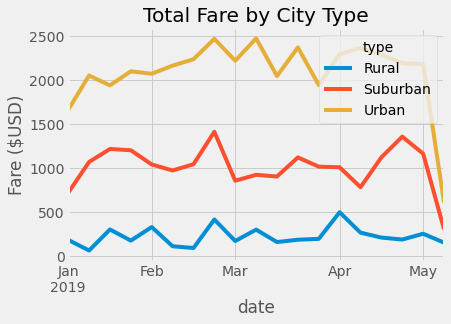

In [86]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style


# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

ptdf_week.plot()
plt.title('Total Fare by City Type')
plt.ylabel('Fare ($USD)')
plt.savefig("analysis/TotalFarebyCityType.png")